In [21]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

data = pd.read_csv('./train.csv')

In [22]:
data = np.array(data)
m, n = data.shape

np.random.shuffle(data)

In [23]:
data[:10]

array([[0, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0],
       ...,
       [5, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0]])

In [24]:
data_dev = data[:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255

feature_num , m_train = X_train.shape

feature_num, m_train

(784, 41000)

In [25]:
Y_train.shape

(41000,)

In [26]:
def initialize_parameters():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    
    return W1, b1, W2, b2

def ReLU(z):
    return np.maximum(z, 0)

def softmax(z):
    A = np.exp(z) / sum(np.exp(z))
    return A

def forward_propagation(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    
    return Z1, A1, Z2, A2

def ReLU_deriv(z):
    return z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def parameters_update(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    
    return W1, b1, W2, b2
    

In [27]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return (np.sum(predictions == Y) / Y.size)*100

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = initialize_parameters()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_propagation(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = parameters_update(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            accuracy = get_accuracy(predictions, Y)
            print(f"{accuracy:.1f}%")
    return W1, b1, W2, b2

In [28]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[9 9 8 ... 0 0 9] [4 1 7 ... 5 3 1]
15.8%
Iteration:  10
[9 9 8 ... 0 3 9] [4 1 7 ... 5 3 1]
24.8%
Iteration:  20
[9 9 8 ... 8 3 1] [4 1 7 ... 5 3 1]
33.4%
Iteration:  30
[9 9 5 ... 8 3 1] [4 1 7 ... 5 3 1]
39.7%
Iteration:  40
[7 9 9 ... 5 3 1] [4 1 7 ... 5 3 1]
46.0%
Iteration:  50
[7 9 9 ... 5 3 1] [4 1 7 ... 5 3 1]
50.9%
Iteration:  60
[7 9 9 ... 5 3 1] [4 1 7 ... 5 3 1]
55.1%
Iteration:  70
[7 4 9 ... 5 3 1] [4 1 7 ... 5 3 1]
59.0%
Iteration:  80
[9 4 9 ... 5 3 1] [4 1 7 ... 5 3 1]
62.6%
Iteration:  90
[9 4 9 ... 5 3 1] [4 1 7 ... 5 3 1]
65.3%
Iteration:  100
[9 4 7 ... 5 3 1] [4 1 7 ... 5 3 1]
67.5%
Iteration:  110
[9 4 7 ... 5 3 1] [4 1 7 ... 5 3 1]
69.3%
Iteration:  120
[9 4 7 ... 5 3 1] [4 1 7 ... 5 3 1]
70.9%
Iteration:  130
[9 4 7 ... 5 3 1] [4 1 7 ... 5 3 1]
72.2%
Iteration:  140
[9 4 7 ... 5 3 1] [4 1 7 ... 5 3 1]
73.3%
Iteration:  150
[9 4 7 ... 5 3 1] [4 1 7 ... 5 3 1]
74.4%
Iteration:  160
[9 4 7 ... 5 3 1] [4 1 7 ... 5 3 1]
75.2%
Iteration:  170
[9 4 7 ..

In [29]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_propagation(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [6]
Label:  6


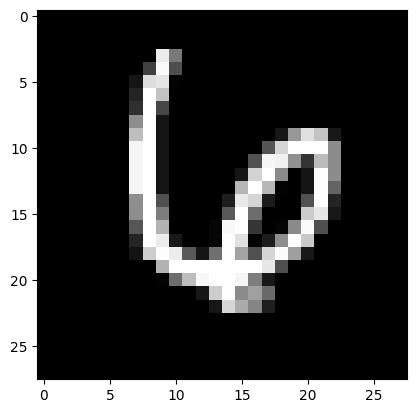

Prediction:  [4]
Label:  4


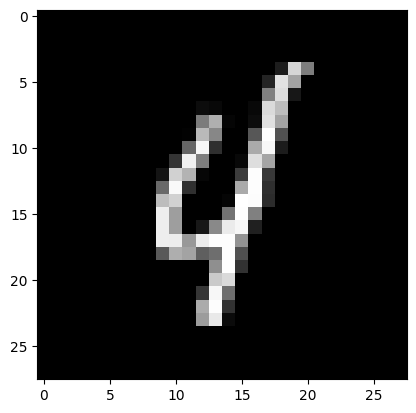

Prediction:  [1]
Label:  1


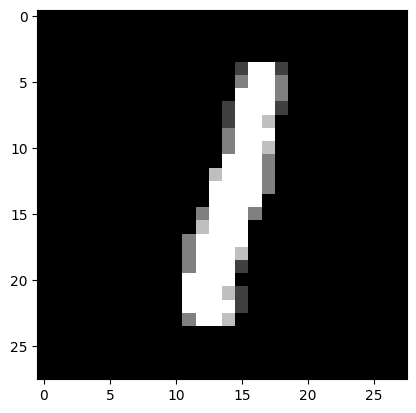

Prediction:  [4]
Label:  4


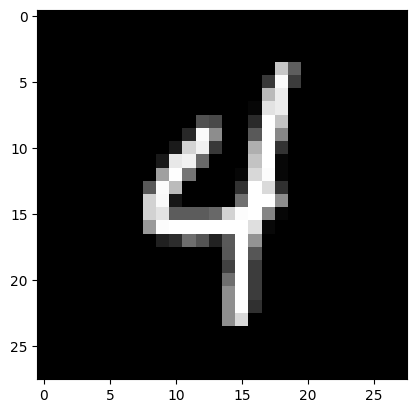

In [31]:
test_prediction(10, W1, b1, W2, b2)
test_prediction(12, W1, b1, W2, b2)
test_prediction(23, W1, b1, W2, b2)
test_prediction(34, W1, b1, W2, b2)